# PART 2: EXPLORATORY DATA ANALYSIS

In [ ]:
# Tasks to be performed:
## Step 1: Import libraries
## Step 2: Import the database
## Step 3: Calculate the parameters of Lipink's rule of five
## Step 4: Normalize IC50 values
## Step 5: Carry out the exploratory analysis itself
## Step 6: Draw insights from the results of the exploratory analysis

# Step 1: Import libraries

In [ ]:
!pip install rdkit
import rdkit
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 1.3 MB/s 


# Step 2: Import the database

In [ ]:
# Importing the pre-processed database
df = pd.read_csv("/content/dados_preprocessados.csv")
display(df)


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL105460  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
1          CHEMBL105606  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
2          CHEMBL105570  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
3           CHEMBL83338  CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...   
4          CHEMBL325357  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
...                 ...                                                ...   
2924      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2925      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2926      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2927      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2928      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   

     classe_bioatividade  standard_value  
0                  Ativo           335.0  
1                  Ativo            28.0  
2                  Ativo            10.0  
3                  Ativo            35.0  
4                  Ativo            15.0  
...                  ...             ...  
2924               Ativo             3.6  
2925               Ativo             1.1  
2926               Ativo             1.1  
2927               Ativo            34.7  
2928               Ativo             5.7  

[2929 rows x 4 columns]

# Step 3: Calculate the parameters of Lipink's rule of five

In [ ]:
## 3.1.  Importando bibliotecas
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
## 3.2. Obtendo os descritores de Lipinsk
# Inspirado em : https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descritores = pd.DataFrame(data=baseData,columns=columnNames)

    return descritores

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

MW    LogP  NumHDonors  NumHAcceptors
0     595.704  5.7114         0.0            9.0
1     518.618  4.6494         0.0            8.0
2     581.717  6.5817         0.0            7.0
3     557.181  5.2894         0.0            4.0
4     567.690  6.4076         0.0            7.0
...       ...     ...         ...            ...
2924  484.649  2.2485         3.0            8.0
2925  506.573  3.4753         3.0            6.0
2926  484.649  2.2485         3.0            8.0
2927  506.573  3.4753         3.0            6.0
2928  484.649  2.2485         3.0            8.0

[2929 rows x 4 columns]

In [ ]:
# Reading the initial dataframe
df

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL105460  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
1          CHEMBL105606  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
2          CHEMBL105570  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
3           CHEMBL83338  CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...   
4          CHEMBL325357  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
...                 ...                                                ...   
2924      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2925      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2926      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2927      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2928      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   

     classe_bioatividade  standard_value  
0                  Ativo           335.0  
1                  Ativo            28.0  
2                  Ativo            10.0  
3                  Ativo            35.0  
4                  Ativo            15.0  
...                  ...             ...  
2924               Ativo             3.6  
2925               Ativo             1.1  
2926               Ativo             1.1  
2927               Ativo            34.7  
2928               Ativo             5.7  

[2929 rows x 4 columns]

In [ ]:
## 3.2. Concatenating the two databases
df_combinado = pd.concat([df,df_lipinski], axis = 1)

In [ ]:
display(df_combinado)

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL105460  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
1          CHEMBL105606  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
2          CHEMBL105570  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
3           CHEMBL83338  CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...   
4          CHEMBL325357  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
...                 ...                                                ...   
2924      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2925      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2926      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2927      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2928      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   

     classe_bioatividade  standard_value       MW    LogP  NumHDonors  \
0                  Ativo           335.0  595.704  5.7114         0.0   
1                  Ativo            28.0  518.618  4.6494         0.0   
2                  Ativo            10.0  581.717  6.5817         0.0   
3                  Ativo            35.0  557.181  5.2894         0.0   
4                  Ativo            15.0  567.690  6.4076         0.0   
...                  ...             ...      ...     ...         ...   
2924               Ativo             3.6  484.649  2.2485         3.0   
2925               Ativo             1.1  506.573  3.4753         3.0   
2926               Ativo             1.1  484.649  2.2485         3.0   
2927               Ativo            34.7  506.573  3.4753         3.0   
2928               Ativo             5.7  484.649  2.2485         3.0   

      NumHAcceptors  
0               9.0  
1               8.0  
2               7.0  
3               4.0  
4               7.0  
...             ...  
2924            8.0  
2925            6.0  
2926            8.0  
2927            6.0  
2928            8.0  

[2929 rows x 8 columns]

In [ ]:
## 3.4. Descriptive analysis of non-standardized IC50 values
df_combinado.standard_value.describe()

count    2.929000e+03
mean     2.175766e+04
std      3.298531e+05
min      3.000000e-03
25%      3.110000e+00
50%      3.000000e+01
75%      4.500000e+02
max      1.000000e+07
Name: standard_value, dtype: float64

# Step 4: Normalize IC50 values

To ensure normal data distribution, we will convert the IC50 values ​​to a negative logarithmic scale: -log10.
To do this we will create the function "pIC50 ()" we will:
a) First multiply all IC50 values ​​by 10-9, converting nM into M.
b) Second: From these results (M unit), we will calculate the "-log10".
Finally, we will delete the variable that contains original IC50 values ​​(non-standardized data) and create a new column with pIC50 values.

In [ ]:
## 4.1. Creating the pIC50 function
# Indpired em: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [ ]:
## Important note:
# Values ​​greater than 100,000,000 will be set to 100,000,000
# otherwise the negative logarithmic value will become negative.

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
## 4.2 Creating standardized normal values

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [ ]:
# We will first apply the normal_value() function, it is important to note that the "standar_value" variable is normalized

In [ ]:
## 4.3. Viewing the data with normal values
df_normal = norm_value(df_combinado)
display(df_normal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL105460  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
1          CHEMBL105606  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
2          CHEMBL105570  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
3           CHEMBL83338  CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...   
4          CHEMBL325357  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
...                 ...                                                ...   
2924      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2925      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2926      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2927      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2928      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   

     classe_bioatividade       MW    LogP  NumHDonors  NumHAcceptors  \
0                  Ativo  595.704  5.7114         0.0            9.0   
1                  Ativo  518.618  4.6494         0.0            8.0   
2                  Ativo  581.717  6.5817         0.0            7.0   
3                  Ativo  557.181  5.2894         0.0            4.0   
4                  Ativo  567.690  6.4076         0.0            7.0   
...                  ...      ...     ...         ...            ...   
2924               Ativo  484.649  2.2485         3.0            8.0   
2925               Ativo  506.573  3.4753         3.0            6.0   
2926               Ativo  484.649  2.2485         3.0            8.0   
2927               Ativo  506.573  3.4753         3.0            6.0   
2928               Ativo  484.649  2.2485         3.0            8.0   

      standard_value_norm  
0                   335.0  
1                    28.0  
2                    10.0  
3                    35.0  
4                    15.0  
...                   ...  
2924                  3.6  
2925                  1.1  
2926                  1.1  
2927                 34.7  
2928                  5.7  

[2929 rows x 8 columns]

In [ ]:
## 4.4. Describing the new Dataframe
df_normal.describe()

MW         LogP   NumHDonors  NumHAcceptors  \
count  2929.000000  2929.000000  2929.000000    2929.000000   
mean    537.494136     5.355210     0.914305       4.741209   
std      93.286021     1.314201     0.938602       1.565710   
min     112.176000    -0.574800     0.000000       0.000000   
25%     492.732000     4.572800     0.000000       4.000000   
50%     539.720000     5.415800     1.000000       5.000000   
75%     586.129000     6.210740     1.000000       6.000000   
max    1225.534000    10.210320     7.000000      16.000000   

       standard_value_norm  
count         2.929000e+03  
mean          2.175766e+04  
std           3.298531e+05  
min           3.000000e-03  
25%           3.110000e+00  
50%           3.000000e+01  
75%           4.500000e+02  
max           1.000000e+07

In [ ]:
## 4.5. Applying the pI50 function
df_final = pIC50(df_normal)
display(df_final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL105460  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
1          CHEMBL105606  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
2          CHEMBL105570  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
3           CHEMBL83338  CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...   
4          CHEMBL325357  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
...                 ...                                                ...   
2924      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2925      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2926      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2927      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2928      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   

     classe_bioatividade       MW    LogP  NumHDonors  NumHAcceptors     pIC50  
0                  Ativo  595.704  5.7114         0.0            9.0  6.474955  
1                  Ativo  518.618  4.6494         0.0            8.0  7.552842  
2                  Ativo  581.717  6.5817         0.0            7.0  8.000000  
3                  Ativo  557.181  5.2894         0.0            4.0  7.455932  
4                  Ativo  567.690  6.4076         0.0            7.0  7.823909  
...                  ...      ...     ...         ...            ...       ...  
2924               Ativo  484.649  2.2485         3.0            8.0  8.443697  
2925               Ativo  506.573  3.4753         3.0            6.0  8.958607  
2926               Ativo  484.649  2.2485         3.0            8.0  8.958607  
2927               Ativo  506.573  3.4753         3.0            6.0  7.459671  
2928               Ativo  484.649  2.2485         3.0            8.0  8.244125  

[2929 rows x 8 columns]

In [ ]:
# Saving the dataset with three classes
df_final.to_csv("dataset_3classes.csv")

In [ ]:
## 4.6. Describing the Final dataframe
df_final.pIC50.describe()

count    2929.000000
mean        7.321576
std         1.500807
min         2.000000
25%         6.346787
50%         7.522879
75%         8.507240
max        11.522879
Name: pIC50, dtype: float64

In [ ]:
# Now we will remove the "intermediate" class from the final database
df_2classes = df_final[df_final.classe_bioatividade != 'Intermediário']
df_2classes

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL105460  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
1          CHEMBL105606  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
2          CHEMBL105570  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
3           CHEMBL83338  CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...   
4          CHEMBL325357  C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...   
...                 ...                                                ...   
2924      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2925      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2926      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2927      CHEMBL4781426  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   
2928      CHEMBL4594419  CC(=O)N[C@@H]1C[C@H](NC(C)(C)C)CC[C@@H]1N1CC[C...   

     classe_bioatividade       MW    LogP  NumHDonors  NumHAcceptors     pIC50  
0                  Ativo  595.704  5.7114         0.0            9.0  6.474955  
1                  Ativo  518.618  4.6494         0.0            8.0  7.552842  
2                  Ativo  581.717  6.5817         0.0            7.0  8.000000  
3                  Ativo  557.181  5.2894         0.0            4.0  7.455932  
4                  Ativo  567.690  6.4076         0.0            7.0  7.823909  
...                  ...      ...     ...         ...            ...       ...  
2924               Ativo  484.649  2.2485         3.0            8.0  8.443697  
2925               Ativo  506.573  3.4753         3.0            6.0  8.958607  
2926               Ativo  484.649  2.2485         3.0            8.0  8.958607  
2927               Ativo  506.573  3.4753         3.0            6.0  7.459671  
2928               Ativo  484.649  2.2485         3.0            8.0  8.244125  

[2603 rows x 8 columns]

# Step 5: Carry out the exploratory analysis itself: Pfizer Rule (lipinsk)



In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## 5.1. Importing libraries
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Creating the frequency graph of the two classes of compounds (active versus inactive)

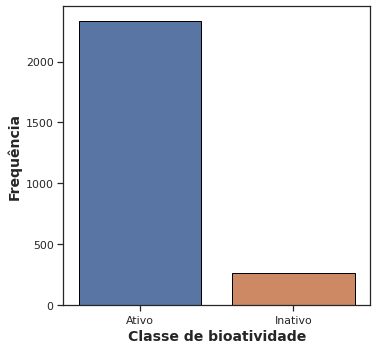

In [ ]:
# Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='classe_bioatividade', data=df_2classes, edgecolor='black')
plt.xlabel('Classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold')


## Salvando o gráfico no formato pdf
plt.savefig('plot_bioactivity_class.pdf')

# Creating the scatter plot of molecular weight versus LogP

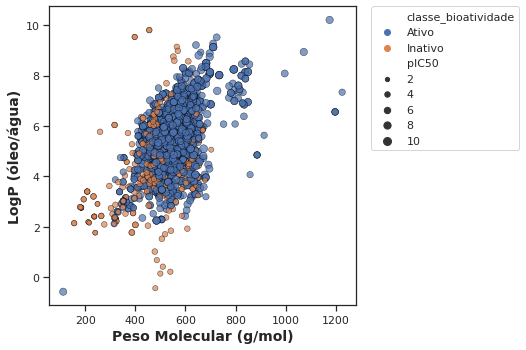

In [ ]:
## Creating the scatter plot of molecular weight versus LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2classes, hue='classe_bioatividade', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Peso Molecular (g/mol)', fontsize=14, fontweight='bold')
plt.ylabel('LogP (óleo/água)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Building the Box Plot graph of bioactivity versus pIC5 values

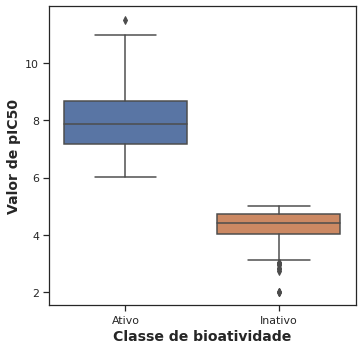

In [ ]:
## Building the graph

plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'classe_bioatividade', y = 'pIC50', data = df_2classes)
plt.xlabel('Classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Valor de pIC50', fontsize=14, fontweight='bold')


## Saving the chart
plt.savefig('plot_ic50.pdf')

# Comparing the two groups: Mann Witneey statistics

In [ ]:
def mannwhitney(descriptor, verbose=False):
  ## Inspirado em: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# Semear o ferador de números aleatórios
  seed(1)

# ativos e inativos
  selection = [descriptor, 'classe_bioatividade']
  df = df_2classes[selection]
  ativo = df[df.classe_bioatividade == 'Ativo']
  ativo = ativo[descriptor]

  selection = [descriptor, 'classe_bioatividade']
  df = df_2classes[selection]
  inativo = df[df.classe_bioatividade == 'Inativo']
  inativo = inativo[descriptor]

# comparar amostras
  stat, p = mannwhitneyu(ativo, inativo)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretar
  alpha = 0.05
  if p > alpha:
    interpretation = 'Mesma distribuição (fail to reject H0)'
  else:
    interpretation = 'Diferentes distribuições (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

## Comparing pIC50 values ​​in the two classes of compounds: Mann Witney test

In [ ]:
mannwhitney('pIC50')

Descriptor  Statistics              p  alpha  \
0      pIC50    623712.0  2.710770e-158   0.05   

                         Interpretation  
0  Diferentes distribuições (reject H0)

In [ ]:
# Agora é só fazer o resto de descritores de lipinsk

## Comparing molecular weight values ​​between the two classes of compounds: Mann Witney Test

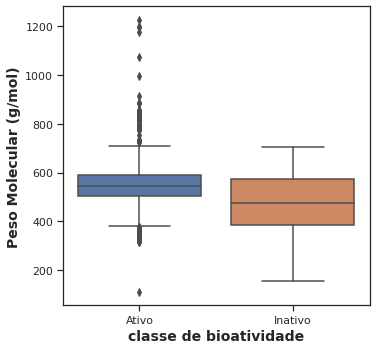

In [ ]:
# Molecular weight
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'MW', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Peso Molecular (g/mol)', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

Descriptor  Statistics             p  alpha  \
0         MW    424236.5  4.467740e-22   0.05   

                         Interpretation  
0  Diferentes distribuições (reject H0)

## Comparing LogP values ​​between the two classes of compounds: Mann Witney Test

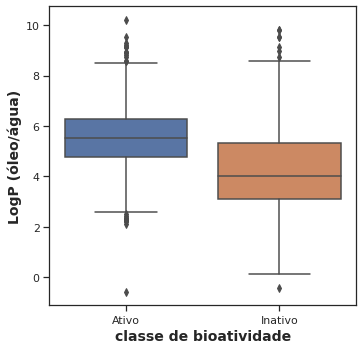

In [ ]:
# LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'LogP', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('LogP (óleo/água)', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

Descriptor  Statistics             p  alpha  \
0       LogP    460731.0  1.710051e-37   0.05   

                         Interpretation  
0  Diferentes distribuições (reject H0)

# Comparing the number of hydrogen bond donor groups between the two classes of compounds: Mann Witney test

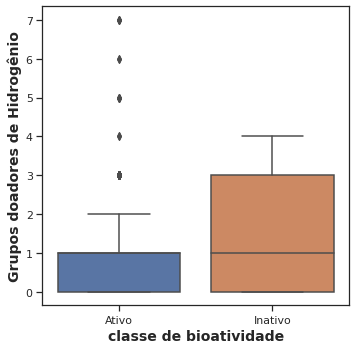

In [ ]:
# Hydrogen bond donating groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'NumHDonors', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Grupos doadores de Hidrogênio', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

Descriptor  Statistics             p  alpha  \
0  NumHDonors    216892.0  7.810460e-19   0.05   

                         Interpretation  
0  Diferentes distribuições (reject H0)

# Comparing the number of hydrogen bond acceptor groups between the two classes of compounds: Mann Witney test

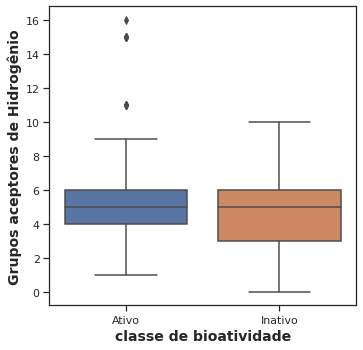

In [ ]:
# Hydrogen bond acceptor groups
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'classe_bioatividade', y = 'NumHAcceptors', data = df_2classes)

plt.xlabel('classe de bioatividade', fontsize=14, fontweight='bold')
plt.ylabel('Grupos aceptores de Hidrogênio', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics        p  alpha  \
0  NumHAcceptors    326615.5  0.19302   0.05   

                           Interpretation  
0  Mesma distribuição (fail to reject H0)

# EXPLORATORY ANALYSIS: CONCLUSIONS

In [ ]:
# Considering the pIC50 analysis, the values ​​of active and bioactive compounds were statistically different. These results were already expected;
# The threshld was 6, that is, bioactive compounds: pIC50>6; inactive compounds: pIC50<6;
# Two other lipinsk descriptors (logP, donor groups) also showed similar results;
# However, the number of hydrogen donating groups were not statistically different between the two classes of compounds (p = 0.193);
# Overall, we can conclude that the two classes of compounds meet the drug-likeness characteristics proposed by Pfizer Pharmaceuticals;
# Deep analysis using supervised machine learning models is warranted.

# Lastly, saving (zipping) all files generated in this Jupyter notebook

In [ ]:
! zip -r resultados.zip . -i *.csv *.pdf

  adding: dados_preprocessados.csv (deflated 88%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: dataset_3classes.csv (deflated 83%)
  adding: plot_NumHDonors.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 5%)
  adding: mannwhitneyu_MW.csv (deflated 4%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 6%)
  adding: mannwhitneyu_pIC50.csv (deflated 6%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_MW.pdf (deflated 36%)


In [ ]:
# Salvando o dataset_final para futuras análises
df_2classes.to_csv("dataset_2classes.csv")
